## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
results_with_mouse_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
results_with_mouse_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
mouse_count = len(results_with_mouse_data["Mouse ID"].unique())
mouse_count


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.  
dup_mice = results_with_mouse_data[results_with_mouse_data.duplicated(["Mouse ID", "Timepoint"])]
dup_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_data = results_with_mouse_data.loc[results_with_mouse_data["Mouse ID"] == "g989"]
dup_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results = results_with_mouse_data.loc[results_with_mouse_data["Mouse ID"] != "g989"]
clean_results


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_results["Mouse ID"].unique())
clean_mouse_count


248

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.
   
    




In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.


drugs_grouped = clean_results.groupby(["Drug Regimen"])

summary_stats_df = pd.DataFrame({"Tumor_Mean": drugs_grouped["Tumor Volume (mm3)"].mean(),
                                 "Tumor_Median": drugs_grouped["Tumor Volume (mm3)"].median(),
                                 "Tumor_Variance": drugs_grouped["Tumor Volume (mm3)"].var(),
                                 "Tumor_Std_Deviation": drugs_grouped["Tumor Volume (mm3)"].std(),
                                 "Tumor_SEM": drugs_grouped["Tumor Volume (mm3)"].sem()
                                })
summary_stats_df


,Tumor_Mean,Tumor_Median,Tumor_Variance,Tumor_Std_Deviation,Tumor_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

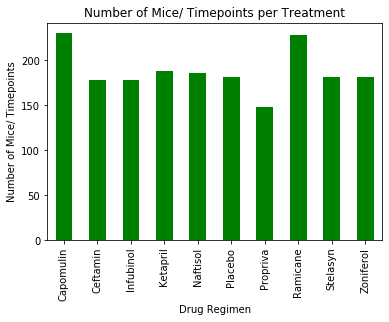

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mouse_count_by_drug = drugs_grouped["Mouse ID"].count()
mouse_count_by_drug_chart = mouse_count_by_drug.plot(kind = "bar", color = "green", title = "Number of Mice/ Timepoints per Treatment")
mouse_count_by_drug_chart.set_ylabel("Number of Mice/ Timepoints")
mouse_count_by_drug_chart



In [ ]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.




## Pie Plots

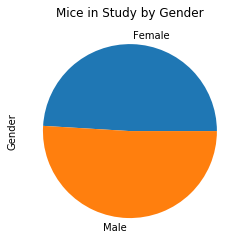

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_results.groupby(["Sex"])

mouse_count_by_gender = gender_group["Mouse ID"].count()
mouse_count_by_gender_chart = mouse_count_by_gender.plot(kind = "pie", title = "Mice in Study by Gender")
mouse_count_by_gender_chart.set_ylabel("Gender")
mouse_count_by_drug_chart





In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

study_tumor_capomulin = clean_results.loc[clean_results["Drug Regimen"] == "Capomulin"]
study_tumor_capomulin = study_tumor_capomulin.sort_values(["Mouse ID", "Timepoint"])
study_tumor_capomulin = study_tumor_capomulin.drop_duplicates(subset=["Mouse ID"], keep = "last")
final_tumor_capomulin = study_tumor_capomulin["Tumor Volume (mm3)"]
quartiles_capomulin = final_tumor_capomulin.quantile([0.25,0.5,0.75])
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin - lowerq_capomulin
lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)

print(f"lower_bound_capomulin = {lower_bound_capomulin}")
print(f"upper_bound_capomulin = {upper_bound_capomulin}")


study_tumor_ceftamin = clean_results.loc[clean_results["Drug Regimen"] == "Ceftamin"]
study_tumor_ceftamin = study_tumor_ceftamin.sort_values(["Mouse ID", "Timepoint"])
study_tumor_ceftamin = study_tumor_ceftamin.drop_duplicates(subset=["Mouse ID"], keep = "last")
final_tumor_ceftamin = study_tumor_ceftamin["Tumor Volume (mm3)"]
quartiles_ceftamin = final_tumor_ceftamin.quantile([0.25,0.5,0.75])
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin - lowerq_ceftamin
lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)

# print(quartiles_ceftamin)
# print(lowerq_ceftamin)
# print(upperq_ceftamin)
# print(iqr_ceftamin)
print(f"lower_bound_ceftamin = {lower_bound_ceftamin}")
print(f"upper_bound_ceftamin = {upper_bound_ceftamin}")
#print(final_tumor_ceftamin)

study_tumor_infubinol = clean_results.loc[clean_results["Drug Regimen"] == "Infubinol"]
study_tumor_infubinol = study_tumor_infubinol.sort_values(["Mouse ID", "Timepoint"])
study_tumor_infubinol = study_tumor_infubinol.drop_duplicates(subset=["Mouse ID"], keep = "last")
final_tumor_infubinol = study_tumor_infubinol["Tumor Volume (mm3)"]
quartiles_infubinol = final_tumor_infubinol.quantile([0.25,0.5,0.75])
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol - lowerq_infubinol
lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)

print(quartiles_infubinol)
print(lowerq_infubinol)
print(upperq_infubinol)
print(iqr_infubinol)
print(f"lower_bound_infubinol = {lower_bound_infubinol}")
print(f"upper_bound_infubinol = {upper_bound_infubinol}")
print(final_tumor_infubinol)


study_tumor_ramicane = clean_results.loc[clean_results["Drug Regimen"] == "Ramicane"]
study_tumor_ramicane = study_tumor_ramicane.sort_values(["Mouse ID", "Timepoint"])
study_tumor_ramicane = study_tumor_ramicane.drop_duplicates(subset=["Mouse ID"], keep = "last")
final_tumor_ramicane = study_tumor_ramicane["Tumor Volume (mm3)"]
quartiles_ramicane = final_tumor_ramicane.quantile([0.25,0.5,0.75])
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane - lowerq_ramicane
lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)

print(f"lower_bound_ramicane = {lower_bound_ramicane}")
print(f"upper_bound_ramicane = {upper_bound_ramicane}")


lower_bound_capomulin = 20.70456164999999
upper_bound_capomulin = 51.83201549
lower_bound_ceftamin = 25.355449580000002
upper_bound_ceftamin = 87.66645829999999
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
54.04860769
65.52574285
11.477135160000003
lower_bound_infubinol = 36.83290494999999
upper_bound_infubinol = 82.74144559000001
463     67.973419
473     65.525743
530     57.031862
540     66.083066
637     72.226731
669     36.321346
742     60.969711
800     62.435404
834     60.918767
949     67.289621
1053    66.196912
1076    62.117279
1205    47.010364
1225    60.165180
1312    55.629428
1314    45.699331
1397    54.656549
1485    55.650681
1616    46.250112
1632    54.048608
1640    51.542431
1683    50.005138
1726    58.268442
1813    67.685569
1872    62.754451
Name: Tumor Volume (mm3), dtype: float64
lower_bound_ramicane = 17.912664470000003
upper_bound_ramicane = 54.30681135


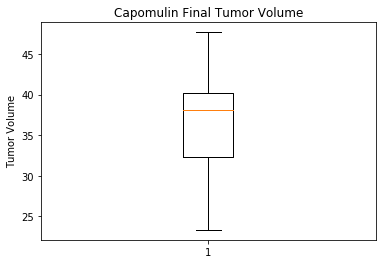

<Figure size 432x288 with 0 Axes>

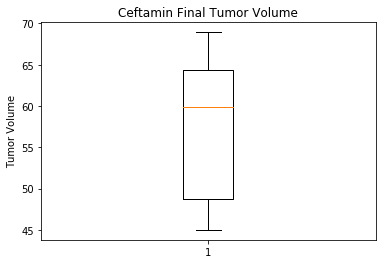

<Figure size 432x288 with 0 Axes>

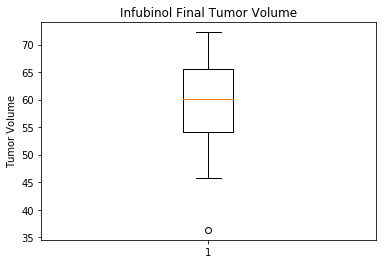

<Figure size 432x288 with 0 Axes>

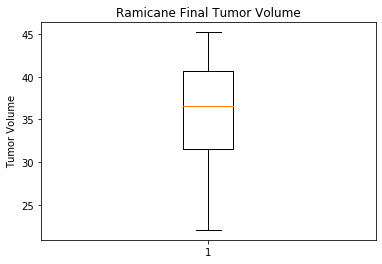

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Final Tumor Volume')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(final_tumor_capomulin)
plt.show()
plt.tight_layout()

fig2, ax2 = plt.subplots()
ax2.set_title('Ceftamin Final Tumor Volume')
ax2.set_ylabel('Tumor Volume')
ax2.boxplot(final_tumor_ceftamin)
plt.show()
plt.tight_layout()

fig3, ax3 = plt.subplots()
ax3.set_title('Infubinol Final Tumor Volume')
ax3.set_ylabel('Tumor Volume')
ax3.boxplot(final_tumor_infubinol)
plt.show()
plt.tight_layout()

fig4, ax4 = plt.subplots()
ax4.set_title('Ramicane Final Tumor Volume')
ax4.set_ylabel('Tumor Volume')
ax4.boxplot(final_tumor_ramicane)
plt.show()
plt.tight_layout()



## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
